In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np

visualizing data
generate dataset for training

In [2]:
image_size = [224, 224, 3] # fix image size

In [3]:
train_dir = 'dataset/train/' #training dataset folder
test_dir = 'dataset/val/' #testing dataset folder

In [4]:
train_data_gen = ImageDataGenerator(rescale=1. / 225)
test_data_gen = ImageDataGenerator(rescale=1. / 225 )

In [5]:
train_data = train_data_gen.flow_from_directory(train_dir, target_size=(120,120), class_mode='categorical', batch_size=16)
test_data = test_data_gen.flow_from_directory(test_dir, target_size=(120,120), class_mode='categorical', batch_size=16)

Found 360 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


building deep learning model using pre trained weights 

In [6]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=image_size)

58889256/58889256 [==============================] - 4s 0us/step


In [7]:
for layer in vgg.layers:
    layer.trainable = False

In [8]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
from keras.layers import Dense, GlobalAveragePooling2D, Flatten

In [10]:
model = Sequential([
    vgg,
    GlobalAveragePooling2D(),
    Dense(200, activation='relu'),
    Dense(3, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 200)               102600    
                                                                 
 dense_1 (Dense)             (None, 3)                 603       
                                                                 
Total params: 14,817,891
Trainable params: 103,203
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train_data, 
    validation_data=test_data, 
    epochs=10,
)

Epoch 1/10
23/23 [==============================] - 21s 845ms/step - loss: 0.9815 - accuracy: 0.4972 - val_loss: 0.8093 - val_accuracy: 0.6778
Epoch 2/10
23/23 [==============================] - 20s 891ms/step - loss: 0.6846 - accuracy: 0.7361 - val_loss: 0.6171 - val_accuracy: 0.8111
Epoch 3/10
23/23 [==============================] - 20s 898ms/step - loss: 0.5318 - accuracy: 0.8361 - val_loss: 0.5355 - val_accuracy: 0.7889
Epoch 4/10
23/23 [==============================] - 24s 1s/step - loss: 0.4648 - accuracy: 0.8472 - val_loss: 0.5098 - val_accuracy: 0.8000
Epoch 5/10
23/23 [==============================] - 21s 930ms/step - loss: 0.3957 - accuracy: 0.8722 - val_loss: 0.3976 - val_accuracy: 0.8333
Epoch 6/10
23/23 [==============================] - 21s 928ms/step - loss: 0.3391 - accuracy: 0.8972 - val_loss: 0.3690 - val_accuracy: 0.8333
Epoch 7/10
23/23 [==============================] - 21s 926ms/step - loss: 0.3004 - accuracy: 0.9083 - val_loss: 0.3407 - val_accuracy: 0.8556
Ep

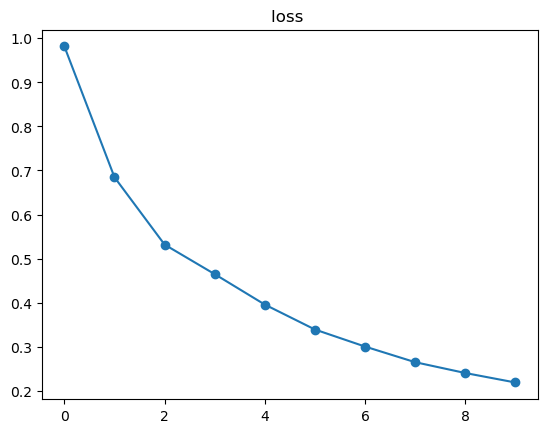

In [14]:
plt.title('loss ')
plt.plot(history.history['loss'], marker='o')

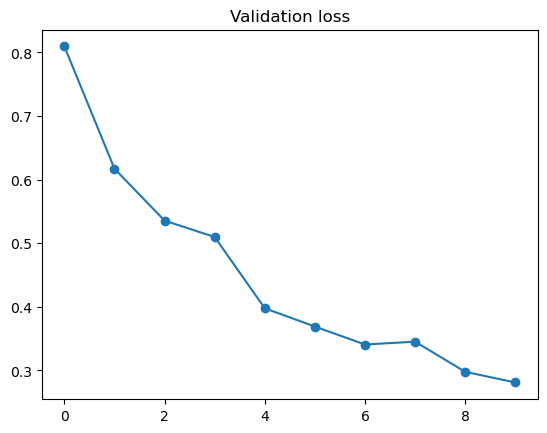

In [15]:
plt.title('Validation loss')
plt.plot(history.history['val_loss'], marker = 'o')

building a custom deep learning model 

In [16]:
model.save('vgg16_epochs_10.h5')